<a href="https://colab.research.google.com/github/Deniscs873/colab/blob/main/Naive_bayes_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação do dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import files

import io
uploaded = files.upload() # uploaded é um dicionário, sendo a chave o nome do arquivo

# Loading dataset
# https://www.kaggle.com/datasets/uciml/iris - Basta fazer p download do arquivo CSV e carregar nesse código.
#list(uploaded.keys())[0] foi a forma que encontrei de não entrar com o nome do arquivo no código
table = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

Saving Iris.csv to Iris.csv


Préprocessamento, Normalização, Treinamento e Previsão(precisão)

In [ ]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


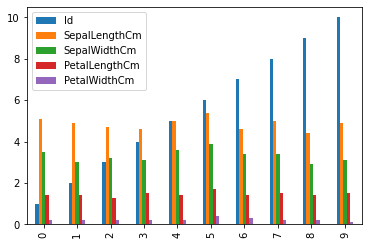

In [ ]:
table.head(10).plot.bar()

In [ ]:
table.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
from sklearn . preprocessing import LabelEncoder
le=LabelEncoder()
table["Species"]=le.fit_transform(table["Species"])
table

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [ ]:
table["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [ ]:
table.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
x=table.iloc[:,:-1].values
y=table.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x_scaled=mm.fit_transform(x)

In [ ]:
ab=pd.DataFrame(x_scaled)
ab

,0,1,2,3,4
0,0.000000,0.222222,0.625000,0.067797,0.041667
1,0.006711,0.166667,0.416667,0.067797,0.041667
2,0.013423,0.111111,0.500000,0.050847,0.041667
3,0.020134,0.083333,0.458333,0.084746,0.041667
4,0.026846,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...,...
145,0.973154,0.666667,0.416667,0.711864,0.916667
146,0.979866,0.555556,0.208333,0.677966,0.750000
147,0.986577,0.611111,0.416667,0.711864,0.791667
148,0.993289,0.527778,0.583333,0.745763,0.916667


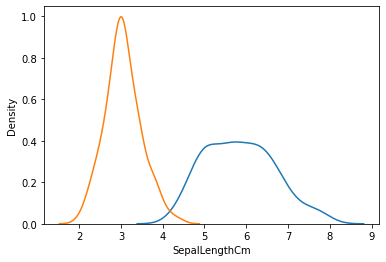

In [ ]:
sns.kdeplot(table["SepalLengthCm"])
sns.kdeplot(table["SepalWidthCm"])

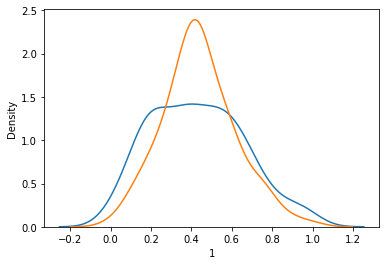

In [ ]:
sns.kdeplot(ab[1])
sns.kdeplot(ab[2])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=11)

In [ ]:
from sklearn.naive_bayes import GaussianNB
s=GaussianNB()
s.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=s.predict(x_test)
y_pred

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
ab=accuracy_score(y_test,y_pred)*100
ab

100.0